In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster  import KMeans 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
data.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [6]:
#Working with neumeric data 
selected_data = ['Age' ,'Credit amount' , 'Duration']
clustered_data = data.loc[:,selected_data]

In [7]:
normalized_df=(clustered_data-clustered_data.mean())/clustered_data.std()
normalized_df

,Age,Credit amount,Duration
0,2.765073,-0.744759,-1.235859
1,-1.190808,0.949342,2.247070
2,1.182721,-0.416354,-0.738298
3,0.831087,1.633430,1.749509
4,1.534354,0.566380,0.256825
...,...,...,...
995,-0.399632,-0.543890,-0.738298
996,0.391544,0.207509,0.754386
997,0.215727,-0.874066,-0.738298
998,-1.102900,-0.505275,1.998289


# Finding Optimal number of clusters

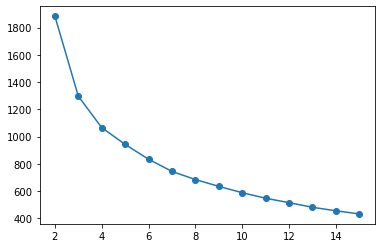

In [8]:
cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
inertias = []

for c in cluster_range:
    kmeans = KMeans(init = 'k-means++', n_clusters = c , n_init = 100 , random_state = 0).fit(normalized_df)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(cluster_range , inertias ,marker = 'o')
plt.show()

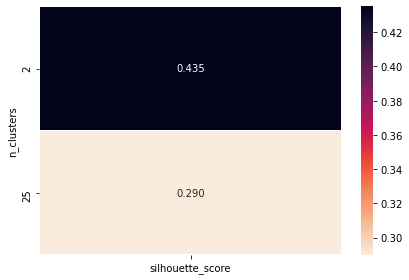

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_range = [2,25]
results = []

for c in cluster_range:
    clusterer = KMeans(init = 'k-means++' , n_clusters=c, n_init = 100,random_state=0)
    cluster_label = clusterer.fit_predict(normalized_df)
    silhouette_avg = silhouette_score(normalized_df , cluster_label)
    results.append([c,silhouette_avg])
    
result = pd.DataFrame(results , columns=['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(result,index = 'n_clusters' , values = 'silhouette_score')

plt.figure()
sns.heatmap(pivot_km,annot = True, linewidth = .5,fmt = '.3f' , cmap = sns.cm.rocket_r)
plt.tight_layout()

# Fitting KMeans algo for 3 clusters 

In [10]:
kmeans_sel = KMeans(init = 'k-means++', n_clusters = 3 , n_init = 100 , random_state = 1).fit(normalized_df)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = clustered_data.assign(Cluster= labels)

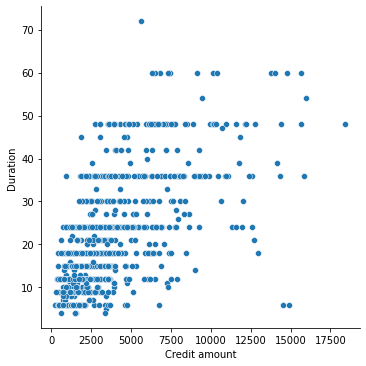

In [11]:
sns.relplot('Credit amount', 'Duration',data = clustered_data)

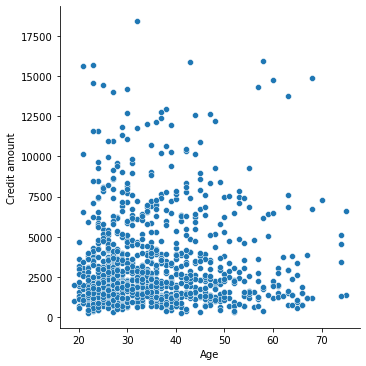

In [12]:
sns.relplot('Age' , 'Credit amount',data = clustered_data)

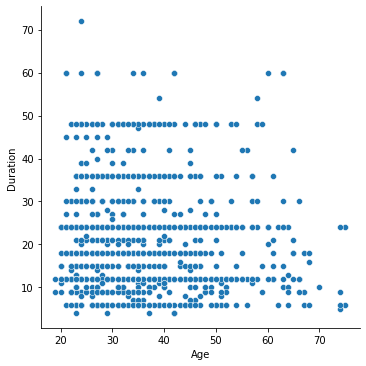

In [13]:
sns.relplot('Age', 'Duration',data = clustered_data)

In [14]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km.sort_values(by = 'Age')

,Age,Credit amount,Duration
Cluster,,,
2,29.7,2205.5,16.9
0,34.7,7587.2,39.3
1,51.7,2398.5,15.8
